<h2>Store Keeping Model Development<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
d=pd.read_csv(r"C:\Users\AYOADE\Desktop/storedata.csv")

In [2]:
d.head(5)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [3]:
d.size

2584

In [4]:
d.shape

(136, 19)

In [5]:
d.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [6]:
d.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [7]:
d.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [8]:
d.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool

In [9]:
sum(d.duplicated())

0

In [10]:
for i in d.columns:
    print(f"{i} : {d[i].nunique()}")

Town : 136
Country : 2
Store ID : 136
Manager name : 118
Staff : 8
Floor Space : 135
Window : 25
Car park : 4
Demographic score : 10
Location : 4
40min population : 136
30 min population : 136
20 min population : 136
10 min population : 136
Store age : 10
Clearance space : 90
Competition number : 10
Competition score : 10
Performance : 2


In [11]:
for i in d.columns:
    print(f"{i} : {d[i].unique()}")

Town : [' Swinton (Greater Manchester)' ' Stamford' ' Skipton' ' Stratton'
 ' Shepperton' ' Southwell' ' Swinton (South Yorkshire)' ' Sowerby Bridge'
 ' Sheffield' ' Stanley' ' Shepshed' ' Staines' ' Sutton' ' Stafford'
 ' Sawbridgeworth' ' Stocksbridge' ' Salcombe' ' Southminster' ' Slough'
 ' Sedgley' ' St Mawes' ' Sudbury' ' Steyning' ' Southampton' ' Snaith'
 ' Sampford Courtenay' ' Skelmersdale' ' Scunthorpe' ' Sunderland'
 ' Streatham' ' Saxmundham' ' Sandiacre' ' Stretford' ' St Austell'
 ' Stalbridge' ' Southwick' ' Shefford' ' Stanford-le-Hope' ' Swindon'
 ' Stainforth' ' St Helens' ' Stourbridge' ' Swadlincote' ' Sale'
 ' Seaham' ' Southwold' ' Shanklin' ' South Shields' ' Southport'
 ' Stalham' ' Shaw & Crompton' ' South Elmsall' ' St Blazey' ' Sherborne'
 ' Smethwick' ' Stow-on-the-Wold' ' Sandwich' ' Shaftesbury' ' Spalding'
 ' Stockton-on-Tees' ' Stroud' ' Scarborough' ' South Molton' ' Saltash'
 ' Shoeburyness' ' Sutton-in-Ashfield' ' Shifnal' ' Strood' ' Southam'
 ' Shi

In [12]:
d['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [13]:
d['Car park']=d['Car park'].replace('Y', 'Yes')
d['Car park']=d['Car park'].replace('N', 'No')
d['Car park'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,136.0,5.217258e+04,28725.990237,1437.0,24707.25,56011.5,76870.50,99854.0
Staff,136.0,1.335294e+01,56.592439,-2.0,6.00,7.0,8.00,600.0
Floor Space,136.0,1.502410e+04,2761.801921,10072.0,12793.00,14596.5,17543.75,19869.0
Window,136.0,1.120441e+02,6.884085,100.0,106.75,111.0,118.00,124.0
Demographic score,136.0,1.446324e+01,2.874944,10.0,12.00,14.5,17.00,19.0
40min population,136.0,1.487374e+06,280498.938383,1030405.0,1254949.25,1516337.5,1696352.50,1997044.0
30 min population,136.0,1.249870e+06,216087.516523,1000653.0,1057284.00,1214459.0,1396966.75,1929089.0
20 min population,136.0,1.134533e+06,149027.970296,1000214.0,1012572.75,1077542.0,1203076.75,1723395.0
10 min population,136.0,1.066118e+06,88845.853887,1000002.0,1005593.00,1033228.5,1090349.00,1426533.0
Store age,136.0,6.529412e+00,2.815147,2.0,4.00,6.0,9.00,11.0


<Axes: >

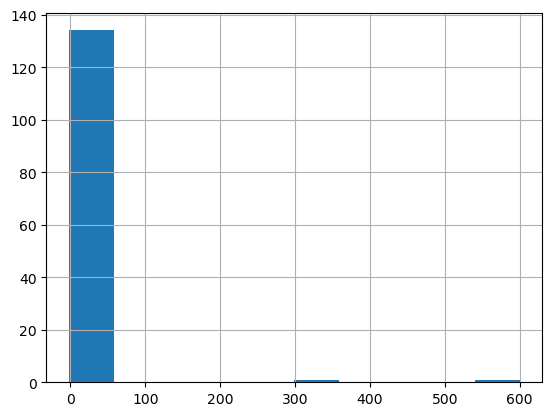

In [15]:
d['Staff'].hist()

<Axes: >

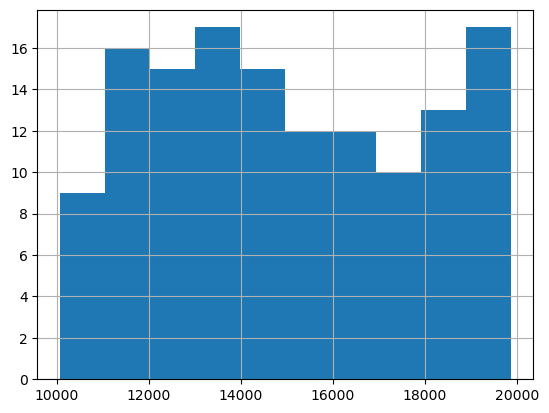

In [16]:
d['Floor Space'].hist()

<Axes: >

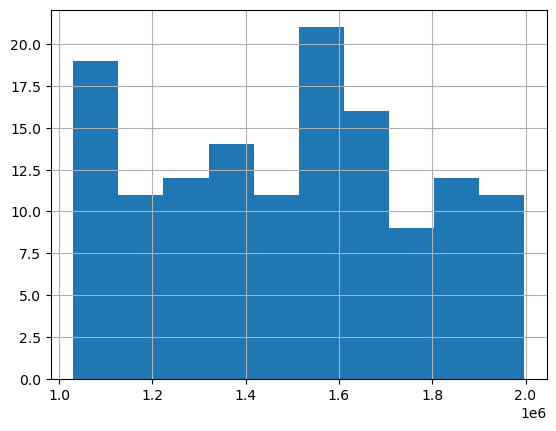

In [17]:
d['40min population'].hist()

<Axes: >

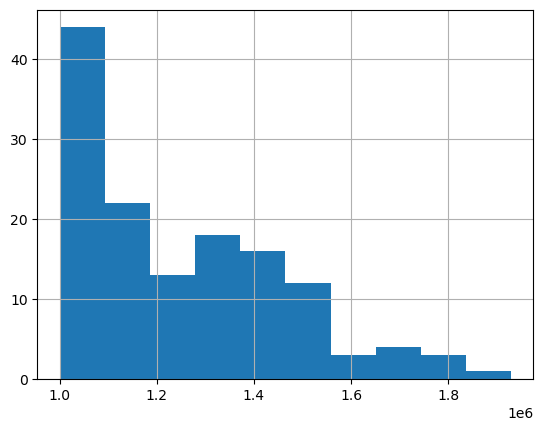

In [18]:
d['30 min population'].hist()

C:\Users\AYOADE\Music\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


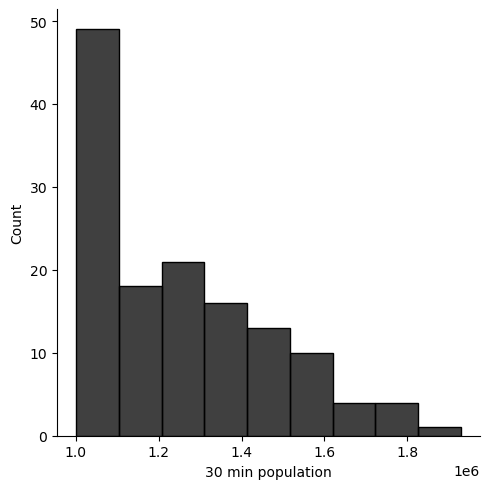

In [19]:
sns.displot(d['30 min population'],color='black')

In [20]:
d.sample(n=4)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
79,South Woodham Ferrers,UK,60116,Megan,8,12092,105,Yes,11,Shopping Centre,1244807,1228531,1076416,1037950,11,236,16,11,Good
72,Swaffham,UK,58249,Jo,9,13008,107,No,17,High Street,1568216,1509273,1447590,1253376,5,251,14,18,Good
126,Sevenoaks,UK,92768,Joaqu�n,7,14962,112,No,10,High Street,1034523,1028457,1002231,1002201,4,246,14,16,Bad
37,Stanford-le-Hope,UK,32610,Isabella,7,11834,104,No,12,Retail Park,1555172,1489253,1120444,1093443,8,219,19,16,Good


In [21]:
one_hot=pd.get_dummies(d['Car park'], dtype=int)

In [22]:
one_hot

,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
131,0,1
132,1,0
133,1,0
134,1,0


In [23]:
pd.concat([d,one_hot],axis=1)                                                         

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,...,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,...,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,...,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,...,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,...,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,...,1085170,1003137,1002513,7,200,19,13,Bad,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,...,1240813,1141898,1041041,6,202,18,14,Bad,0,1
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,...,1424404,1378708,1160929,5,203,13,18,Bad,1,0
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,...,1359511,1200486,1063718,7,341,18,18,Bad,1,0
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,...,1245725,1127276,1045154,11,261,14,10,Bad,1,0


In [24]:
d=pd.concat([d,one_hot],axis=1)

In [25]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,...,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,...,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,...,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,...,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,...,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,...,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [26]:
d.drop('Car park', axis=1,inplace=True)

In [27]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [28]:
d.Location.unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

In [29]:
d.groupby('Location')['Clearance space'].sum()

Location
High Street        10299
Retail Park        11189
Shopping Centre    13834
Village              368
Name: Clearance space, dtype: int64

<Axes: ylabel='Location'>

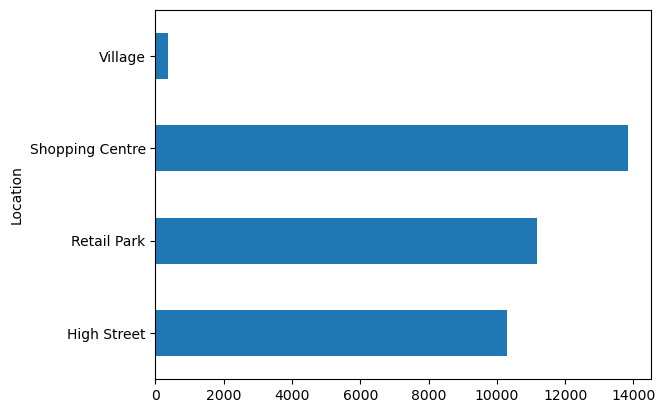

In [30]:
d.groupby('Location')['Clearance space'].sum().plot(kind='barh')

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
le.fit_transform(d.Location)

array([1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 3, 1, 1, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2,
       2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 2, 0, 0])

In [33]:
d.Location= le.fit_transform(d.Location)

In [34]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good,0,1
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good,0,1
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad,1,0
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,Bad,1,0
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad,1,0


In [35]:
d.Country.unique()

array(['UK', 'France'], dtype=object)

In [36]:
o=pd.get_dummies(d.Country)

In [37]:
d=pd.concat([d,o],axis=1)

In [38]:
d.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,10,1,1288374,...,1002340,3,238,16,16,Good,0,1,False,True
1,Stamford,UK,1544,Ella,8,18569,121,11,2,1086225,...,1008436,4,384,15,19,Good,0,1,False,True
2,Skipton,UK,2039,Valentina,-2,12288,105,12,1,1595638,...,1011395,11,219,13,18,Bad,1,0,False,True
3,Stratton,UK,2055,Antonia,7,17092,117,14,0,1179395,...,1002169,5,261,15,12,Bad,1,0,False,True
4,Shepperton,UK,2141,Gabriel,7,11307,103,18,1,1398558,...,1002513,7,200,19,13,Bad,1,0,False,True


In [39]:
d.drop('Country', axis=1,  inplace=True)

In [40]:
d.head()

,Town,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,...,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,Swinton (Greater Manchester),1437,Roger,9,18526,121,10,1,1288374,1138224,...,1002340,3,238,16,16,Good,0,1,False,True
1,Stamford,1544,Ella,8,18569,121,11,2,1086225,1015321,...,1008436,4,384,15,19,Good,0,1,False,True
2,Skipton,2039,Valentina,-2,12288,105,12,1,1595638,1281661,...,1011395,11,219,13,18,Bad,1,0,False,True
3,Stratton,2055,Antonia,7,17092,117,14,0,1179395,1022959,...,1002169,5,261,15,12,Bad,1,0,False,True
4,Shepperton,2141,Gabriel,7,11307,103,18,1,1398558,1085170,...,1002513,7,200,19,13,Bad,1,0,False,True


In [41]:
 d.Town.nunique()

136

In [42]:
d.drop(['Town','Store ID','Manager name'], axis=1, inplace= True)

In [43]:
d.sample(3)

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
125,7,16280,115,14,2,1696068,1109630,1037165,1008244,2,274,18,15,Good,0,1,False,True
115,5,19869,124,16,1,1259975,1118359,1047303,1038885,9,363,15,15,Good,0,1,False,True
91,7,19174,122,12,2,1795548,1001508,1000580,1000052,4,262,19,13,Good,0,1,False,True


Feature Selection

In [44]:
d['Performance']=le.fit_transform(d.Performance)

In [45]:
d.head()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1,0,1,False,True
1,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1,0,1,False,True
2,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,0,1,0,False,True
3,7,17092,117,14,0,1179395,1022959,1009496,1002169,5,261,15,12,0,1,0,False,True
4,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,0,1,0,False,True


In [46]:
d.corr()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
Staff,1.000000,0.076039,0.077630,-0.057831,0.126064,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579,0.124331,-0.071324,0.071324,-0.013765,0.013765
Floor Space,0.076039,1.000000,0.999208,0.038187,0.011581,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447,0.267429,-0.100542,0.100542,-0.070044,0.070044
Window,0.077630,0.999208,1.000000,0.038633,0.012063,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551,0.274381,-0.099573,0.099573,-0.072035,0.072035
Demographic score,-0.057831,0.038187,0.038633,1.000000,-0.136952,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325,-0.117908,0.036597,-0.036597,0.044220,-0.044220
Location,0.126064,0.011581,0.012063,-0.136952,1.000000,0.127160,0.122606,0.056947,0.044362,-0.017015,0.102161,0.007687,0.073904,0.350950,-0.057223,0.057223,-0.088340,0.088340
40min population,-0.098366,0.051918,0.053228,0.036694,0.127160,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554,-0.099861,0.094837,-0.094837,0.032546,-0.032546
30 min population,-0.024631,-0.032199,-0.028688,-0.007616,0.122606,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811,-0.072470,0.122039,-0.122039,0.095203,-0.095203
20 min population,-0.056310,-0.046161,-0.042441,0.053498,0.056947,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492,-0.005909,0.016966,-0.016966,-0.027442,0.027442
10 min population,-0.006601,-0.096698,-0.091651,0.099587,0.044362,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781,0.001953,0.037949,-0.037949,-0.051530,0.051530
Store age,-0.172655,-0.049285,-0.048992,-0.014967,-0.017015,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725,-0.034238,0.104477,-0.104477,-0.044839,0.044839


<Axes: >

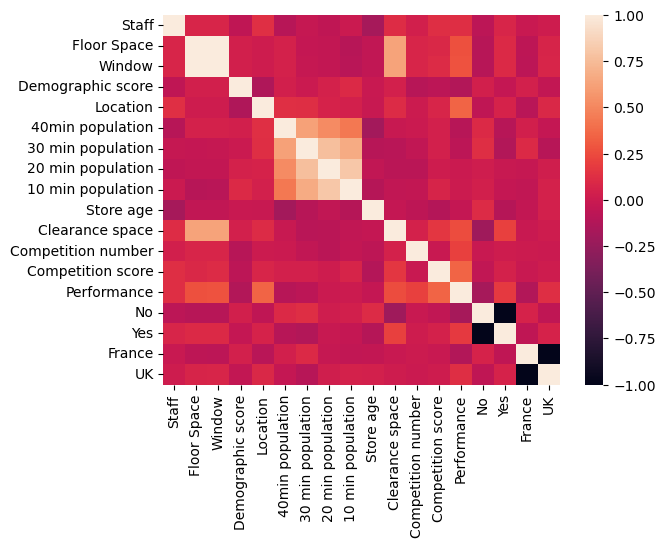

In [48]:
sns.heatmap(d.corr())

In [47]:
d.corr()['Performance']

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score    -0.117908
Location              0.350950
40min population     -0.099861
30 min population    -0.072470
20 min population    -0.005909
10 min population     0.001953
Store age            -0.034238
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                   -0.173044
Yes                   0.173044
France               -0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [49]:
d.sample(3)

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
16,8,14291,110,18,0,1395395,1010441,1005783,1004909,2,272,16,11,1,0,1,False,True
25,5,12234,105,14,1,1765398,1555157,1053211,1015616,7,234,11,16,0,1,0,False,True
22,7,18535,121,13,0,1182360,1077124,1049837,1014968,9,266,11,18,1,1,0,False,True


In [50]:
d.corr()['Performance'].abs()

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
40min population      0.099861
30 min population     0.072470
20 min population     0.005909
10 min population     0.001953
Store age             0.034238
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [51]:
threshold=0.1
Selected_data=d.corr()['Performance'].abs()[d.corr()['Performance'].abs()>=threshold]
Selected_data

Staff                 0.124331
Floor Space           0.267429
Window                0.274381
Demographic score     0.117908
Location              0.350950
Clearance space       0.257304
Competition number    0.209215
Competition score     0.345618
Performance           1.000000
No                    0.173044
Yes                   0.173044
France                0.123979
UK                    0.123979
Name: Performance, dtype: float64

In [52]:
Unselected_data=d.corr()['Performance'].abs()[d.corr()['Performance'].abs()<=threshold]
Unselected_data

40min population     0.099861
30 min population    0.072470
20 min population    0.005909
10 min population    0.001953
Store age            0.034238
Name: Performance, dtype: float64

In [53]:
type(pd.DataFrame(Selected_data))

pandas.core.frame.DataFrame

In [54]:
pd.DataFrame(Selected_data).index

Index(['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK'],
      dtype='object')

In [55]:
Selected=['Staff', 'Floor Space', 'Window', 'Demographic score', 'Location',
       'Clearance space', 'Competition number', 'Competition score',
       'Performance', 'No', 'Yes', 'France', 'UK']

In [56]:
d=d[Selected]
d

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,Performance,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,1,0,1,False,True
1,8,18569,121,11,2,384,15,19,1,0,1,False,True
2,-2,12288,105,12,1,219,13,18,0,1,0,False,True
3,7,17092,117,14,0,261,15,12,0,1,0,False,True
4,7,11307,103,18,1,200,19,13,0,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,13,1,202,18,14,0,0,1,False,True
132,6,11205,103,15,2,203,13,18,0,1,0,False,True
133,7,16190,115,19,2,341,18,18,0,1,0,False,True
134,6,15516,113,17,0,261,14,10,0,1,0,False,True


In [57]:
x=d.drop('Performance', axis=1)
y=d.Performance

In [58]:
x.head()

,Staff,Floor Space,Window,Demographic score,Location,Clearance space,Competition number,Competition score,No,Yes,France,UK
0,9,18526,121,10,1,238,16,16,0,1,False,True
1,8,18569,121,11,2,384,15,19,0,1,False,True
2,-2,12288,105,12,1,219,13,18,1,0,False,True
3,7,17092,117,14,0,261,15,12,1,0,False,True
4,7,11307,103,18,1,200,19,13,1,0,False,True


In [59]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Performance, dtype: int32

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7, shuffle=True, random_state=45)

In [61]:
print(f"The shape of x_train set is : {x_train.shape}")
print(f"The shape of x_test set is : { x_test.shape}")
print(f"The shape of y_train set is : {y_train.shape}")
print(f"The shape of y_test set is : {y_test.shape}")

The shape of x_train set is : (95, 12)
The shape of x_test set is : (41, 12)
The shape of y_train set is : (95,)
The shape of y_test set is : (41,)


In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
nb=GaussianNB()
kmn=KNeighborsClassifier()
scm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [64]:
nb.fit(x_train,y_train)
nb.score(x_train,y_train).round(2)*100

69.0

In [65]:
kmn.fit(x_train,y_train)
kmn.score(x_train,y_train).round(2)*100

78.0

In [66]:
scm.fit(x_train,y_train)
scm.score(x_train,y_train).round(2)*100

66.0

In [67]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train).round(2)*100

100.0

In [68]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train).round(2)*100

100.0

<h2>Testing<h2>

59.0
[[12  7]
 [10 12]]


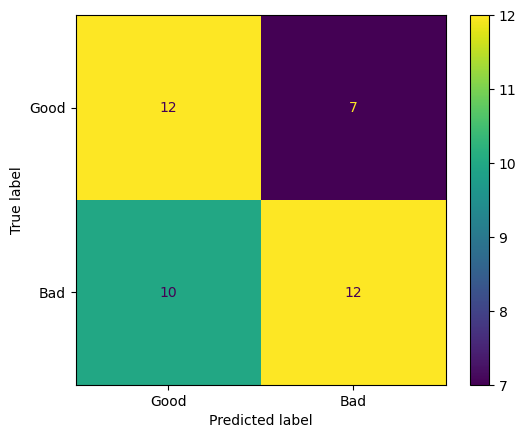

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
nb.predict(x_test)
print (accuracy_score(y_test,nb.predict(x_test)).round(2)*100)
print (confusion_matrix(y_test, nb.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, nb.predict(x_test)),display_labels=label).plot()

In [70]:
round(((12+12)/(12+7+10+12))*100,2)

58.54

39.0
[[ 5 14]
 [11 11]]


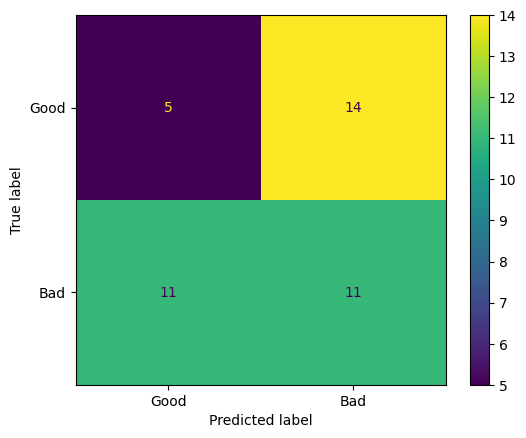

In [71]:
kmn.predict(x_test)
accuracy_score(y_test,kmn.predict(x_test)).round(2)*100
print (accuracy_score(y_test,kmn.predict(x_test)).round(2)*100)
print (confusion_matrix(y_test, kmn.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, kmn.predict(x_test)),display_labels=label).plot()

46.0
[[ 7 12]
 [10 12]]


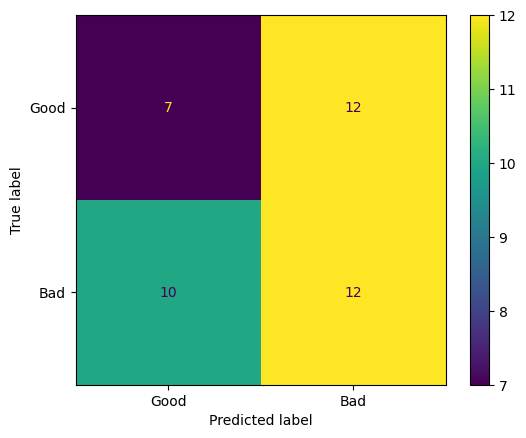

In [72]:
scm.predict(x_test)
accuracy_score(y_test,scm.predict(x_test)).round(2)*100
print (accuracy_score(y_test,scm.predict(x_test)).round(2)*100)
print (confusion_matrix(y_test, scm.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, scm.predict(x_test)),display_labels=label).plot()

#(TRUE VS PREDICTED)(First rows are rotten and second are not(7 is rotten and algorithms also pridited dsame, while 12 are actually rotten(good) but algorithm predicted it  no (bad)

56.00000000000001
[[11  8]
 [10 12]]


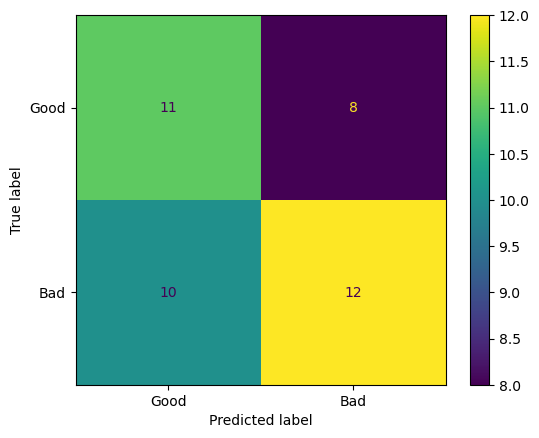

In [73]:
dt.predict(x_test)
accuracy_score(y_test,dt.predict(x_test)).round(2)*100
print (accuracy_score(y_test,dt.predict(x_test)).round(2)*100)
print (confusion_matrix(y_test, dt.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(x_test)),display_labels=label).plot()

63.0
[[11  8]
 [ 7 15]]


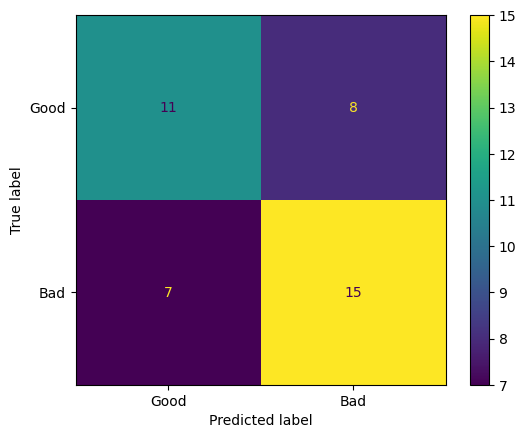

In [74]:
rf.predict(x_test)
accuracy_score(y_test,rf.predict(x_test)).round(2)*100
print (accuracy_score(y_test,rf.predict(x_test)).round(2)*100)
print (confusion_matrix(y_test, rf.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(x_test)),display_labels=label).plot()